In [1]:
import numpy as np
import cte
from ProcessFunctions import PltPODmodesV
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

In [3]:
# Loading POD modes
data_dir="/central/groups/astuart/hkaveh/Data/LearnROM/MainSimulation_Tf600Nt=5PODonlyonV.npz"
PODmodes=np.load(data_dir)
U_v=PODmodes['U']
S_v=PODmodes['S']
VT_v=PODmodes['VT']
q_bar_v=PODmodes['q_bar']

data_dir="/central/groups/astuart/hkaveh/Data/LearnROM/MainSimulation_Tf600Nt=5PODonlyontheta.npz"
PODmodes=np.load(data_dir)
U_theta=PODmodes['U']
S_theta=PODmodes['S']
VT_theta=PODmodes['VT']
q_bar_theta=PODmodes['q_bar']
Nt=VT_v.shape[0]

Sigma_v=np.diagonal(S_v)
Lambda_v=Sigma_v**2/Nt

SumLambda_v=np.cumsum(Lambda_v)
RatioSumLambda_v=SumLambda_v/SumLambda_v[-1]


Sigma_theta=np.diagonal(S_theta)
Lambda_theta=Sigma_theta**2/Nt 

SumLambda_theta=np.cumsum(Lambda_theta)
RatioSumLambda_theta=SumLambda_theta/SumLambda_theta[-1]

    

In [4]:
L=320e3

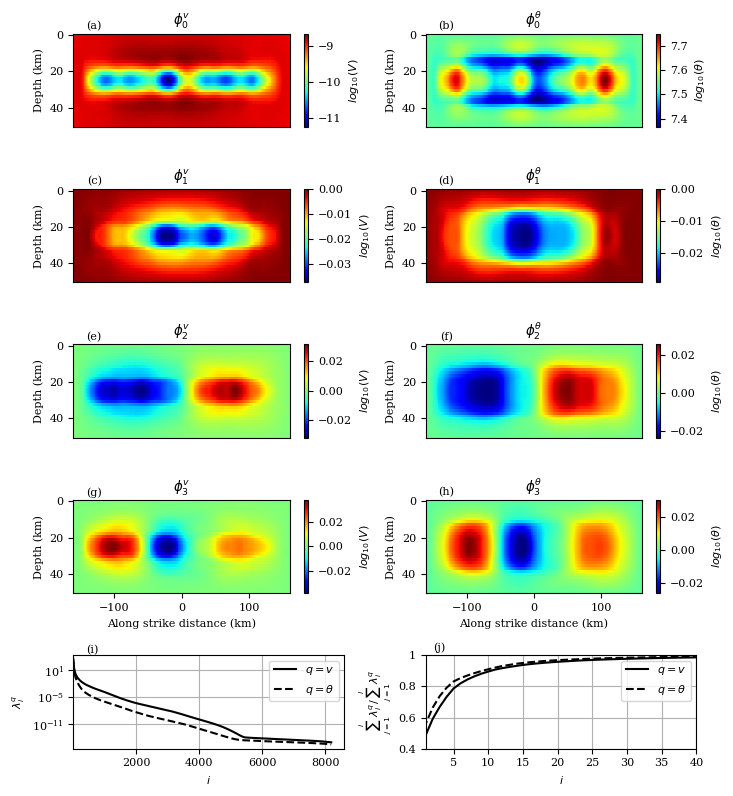

In [8]:
NMods=4
Nz=32
Nx=256
x_ox=np.linspace(-L/2,L/2,Nx)
z_ox=np.linspace(-50e3,0,32)
# Create a sample figure
fig = plt.figure(figsize=(7.4, NMods*2))

# Use serif font and set font size for all text in the figure
plt.rc('font', family='serif')
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 8})
gs = gridspec.GridSpec(nrows=NMods+1, ncols=2)

axes_v = [plt.subplot(gs[i,0]) for i in range(NMods)]
axes_theta = [plt.subplot(gs[i,1]) for i in range(NMods)]

V_bar=q_bar_v.reshape((Nz,Nx))    
theta_bar=q_bar_theta.reshape((Nz,Nx))
pcm=axes_v[0].pcolormesh(x_ox*1e-3,-z_ox*1e-3,V_bar,cmap="jet")
b=fig.colorbar(pcm,ax=axes_v[0])
b.set_label(r'$log_{10}(V)$')

pcm=axes_theta[0].pcolormesh(x_ox*1e-3,-z_ox*1e-3,theta_bar,cmap="jet")
b=fig.colorbar(pcm,ax=axes_theta[0])
b.set_label(r'$log_{10}(\theta)$')


for i in range(NMods-1):     
    Vmode=U_v[:,i]
    Vmode=Vmode.reshape((Nz,Nx)) 
    pcm=axes_v[i+1].pcolormesh(x_ox*1e-3,-z_ox*1e-3,Vmode,cmap="jet")
    b=fig.colorbar(pcm,ax=axes_v[i+1])
    b.set_label(r'$log_{10}(V)$')
[axes_v[i].set_title("$\phi_{{{0}}}^v$".format(str(i))) for i in range(NMods)]
[axes_v[i].set_xticks([]) for i in range(NMods-1)]
[axes_v[i].set_xticks([], minor=True) for i in range(NMods-1)]
[axes_v[i].set_ylabel('Depth (km)') for i in range(NMods)]
[axes_v[i].invert_yaxis() for i in range(NMods)]
axes_v[-1].set_xlabel('Along strike distance (km)')
    
for i in range(NMods-1):     
    Vmode=U_theta[:,i]
    Vmode=Vmode.reshape((Nz,Nx)) 
    pcm=axes_theta[i+1].pcolormesh(x_ox*1e-3,-z_ox*1e-3,Vmode,cmap="jet")
    b=fig.colorbar(pcm,ax=axes_theta[i+1])
    b.set_label(r'$log_{10}(\theta)$')
    # add a text to the plot



axes_theta[0].text(-L/2/1e3+30, -5,'(b)', horizontalalignment='center',verticalalignment='center')
axes_theta[1].text(-L/2/1e3+30, -5,'(d)', horizontalalignment='center',verticalalignment='center')
axes_theta[2].text(-L/2/1e3+30, -5,'(f)', horizontalalignment='center',verticalalignment='center')
axes_theta[3].text(-L/2/1e3+30, -5,'(h)', horizontalalignment='center',verticalalignment='center')

axes_v[0].text(-L/2/1e3+30, -5,'(a)', horizontalalignment='center',verticalalignment='center')
axes_v[1].text(-L/2/1e3+30, -5,'(c)', horizontalalignment='center',verticalalignment='center')
axes_v[2].text(-L/2/1e3+30, -5,'(e)', horizontalalignment='center',verticalalignment='center')
axes_v[3].text(-L/2/1e3+30, -5,'(g)', horizontalalignment='center',verticalalignment='center')




[axes_theta[i].set_title(r"$\phi_{{{0}}}^\theta$".format(str(i))) for i in range(NMods)]
[axes_theta[i].set_xticks([]) for i in range(NMods-1)]
[axes_theta[i].set_xticks([], minor=True) for i in range(NMods-1)]
[axes_theta[i].set_ylabel('Depth (km)') for i in range(NMods)]
[axes_theta[i].invert_yaxis() for i in range(NMods)]
axes_theta[-1].set_xlabel('Along strike distance (km)')

# plotting the eigenvalues
axs1_lambda=fig.add_subplot(gs[-1,0])
axs2_lambda=fig.add_subplot(gs[-1,1])

axs1_lambda.plot(Lambda_v,color='black',label=r'$q=v$')
axs1_lambda.plot(Lambda_theta,color='black',label=r'$q=\theta$',linestyle='--')

axs2_lambda.plot(RatioSumLambda_v,color='black',label=r'$q=v$')
axs2_lambda.plot(RatioSumLambda_theta,color='black',label=r'$q=\theta$',linestyle='--')


axs1_lambda.set_yscale('log')
axs2_lambda.set_yticks([0,0.2,0.4,0.6,0.8,1])
axs2_lambda.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
axs1_lambda.set_xlim(left=1)

axs2_lambda.set_xlim(left=1,right=40)
axs1_lambda.legend()
axs2_lambda.legend()
# add minor grid to the plot
axs1_lambda.grid(which='both')
axs2_lambda.grid(which='both')

axs1_lambda.set_ylabel(r'$\lambda_i^{q}$')
axs2_lambda.set_ylabel(r'$\sum_{j=1}^i\lambda_i^{q}/\sum_{j=1}^l\lambda_i^{q}$')
axs1_lambda.set_xlabel(r'$i$')
axs2_lambda.set_xlabel(r'$i$')
axs2_lambda.set_ylim([.4,1])


axs1_lambda.text(600, 400000,'(i)', horizontalalignment='center',verticalalignment='center')
axs2_lambda.text(3, 1.05,'(j)', horizontalalignment='center',verticalalignment='center')


plt.tight_layout()
# saving figure
fig.savefig("/central/groups/astuart/hkaveh/Figs/ROM/Eigenmodes+.png",dpi=300, bbox_inches='tight')
